# Webscrape

This notebook is the final webscrape product of an iterative process of our EDA and data collection / preparation.

Once we decided to do a Recommendation System on top of our NLP model, we realized that we needed additional data in order to effectively produce and interpret a recommendation system.

Original dataset at:  https://www.kaggle.com/forgemaster/steam-reviews-dataset?select=reviews-1-115.csv

In this notebook I use the app ID for each game to webscrape for that game's Title (needed for interpretation) and that game's tags (things like FPS, action, adventure, puzzle, etc.).

After some discussion we decided to narrow down our dataset to just games tagged with FPS because when performing NLP there might be some key words that have a lot of meaning for FPS games, but not for others.

After webscraping, assigning titles and tags to each row, and then trimming for FPS games, I store the trimmed csvs in a folder outside of my local repo.

#### It's important to note here that the original dataset csvs and the trimmed csvs are too large to push to github, and that's why they're stored in folders outside of the local repo.

In [1]:
import numpy as np 
import pandas as pd 
import string
import time

import re
import requests
from bs4 import BeautifulSoup

pd.set_option('display.max_colwidth', 100)

import IPython
sound_file = '../../../data/sounds/puzzle_solved_jingle.wav'

import sys
if not 'Notebooks/Individual/Jake' in sys.path:
    sys.path.append('Notebooks/Individual/jake')
from functions import FetchTitlesTags

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ultim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ultim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df0 = pd.read_csv("../../../../archive/reviews-1-115.csv")
df1 = pd.read_csv("../../../../archive/reviews-115-1230.csv")
df2 = pd.read_csv("../../../../archive/reviews-1230-2345.csv")
df3 = pd.read_csv("../../../../archive/reviews-2345-4575.csv")
df4 = pd.read_csv("../../../../archive/reviews-4575-6805.csv")
df5 = pd.read_csv("../../../../archive/reviews-6805-9035.csv")
df6 = pd.read_csv("../../../../archive/reviews-9035-11265.csv")
df7 = pd.read_csv("../../../../archive/reviews-11265-13495.csv")
df8 = pd.read_csv("../../../../archive/reviews-13495-13500.csv")
df9 = pd.read_csv("../../../../archive/reviews-13500-13537.csv")
df10 = pd.read_csv("../../../../archive/reviews-13537-27075.csv")

In [3]:
df0 = df0.dropna()
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()
df7 = df7.dropna()
df8 = df8.dropna()
df9 = df9.dropna()
df10 = df10.dropna()

In [4]:
df2.isna().sum()

steamid                   0
appid                     0
voted_up                  0
votes_up                  0
votes_funny               0
weighted_vote_score       0
playtime_forever          0
playtime_at_review        0
num_games_owned           0
num_reviews               0
review                    0
unix_timestamp_created    0
unix_timestamp_updated    0
dtype: int64

In [5]:
def get_ids_urls(df):
    game_ids = list(df["appid"].unique())

    url_list = []
    for each in game_ids:
        url = "https://store.steampowered.com/app/{}/".format(each)
        url_list.append(url)
    
    return game_ids, url_list

In [6]:
def get_title(soup):
    title = str(soup.find('div', class_="apphub_AppName"))
    title = title.replace('<div class="apphub_AppName" id="appHubAppName">', "")
    title = title.replace('</div>', "")
    return title
    
def get_tags(soup):
    warning = soup.find('div', class_="glance_tags popular_tags")
    tags = [p.text for p in warning.findAll('a', class_="app_tag")]
    
    for index in range(len(tags)):
        tags[index] = tags[index].replace("\t", "")
        tags[index] = tags[index].replace("\r\n", "")
    return tags

In [7]:
def get_titles_tags(url_list):
    titles = []
    tags = []

    for url in url_list:
        html_page = requests.get(url)
        soup = BeautifulSoup(html_page.content, 'html.parser')
        titles.append(get_title(soup))
        tags.append(get_tags(soup))
        time.sleep(1)
        
    return titles, tags

In [8]:
def add_titles(appid, game_ids, titles):
    for index in range(len(game_ids)):
        if appid == game_ids[index]:
            title = titles[index]
    return title

In [9]:
def add_tags(appid, game_ids, tags):
    for index in range(len(game_ids)):
         if appid == game_ids[index]:
                tag = tags[index]
    return tag

In [10]:
def add_features(df):
    game_ids, url_list = get_ids_urls(df)
    titles, tags = get_titles_tags(url_list)
    
    df["app_title"] = df["appid"].apply(lambda x: add_titles(x, game_ids, titles))
    df["app_tags"] = df["appid"].apply(lambda x: add_tags(x, game_ids, tags))
    
    return df

In [11]:
col = ["steamid", "appid", "app_title", "app_tags", "review", "voted_up"]

def get_FPS(tags):
    result = False
    if "FPS" in tags:
        result = True
    return result

In [12]:
df0_added = add_features(df0)
df0_trim = df0_added[col]
df0_trim["fps"] = df0_trim["app_tags"].apply(lambda x: get_FPS(x))
df0_trim = df0_trim[df0_trim["fps"] == True]

<ipython-input-12-8984468eaad6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0_trim["fps"] = df0_trim["app_tags"].apply(lambda x: get_FPS(x))


In [13]:
df1_added = add_features(df1)
df1_trim = df1_added[col]
df1_trim["fps"] = df1_trim["app_tags"].apply(lambda x: get_FPS(x))
df1_trim = df1_trim[df1_trim["fps"] == True]

<ipython-input-13-366f64449102>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_trim["fps"] = df1_trim["app_tags"].apply(lambda x: get_FPS(x))


In [14]:
df2_added = add_features(df2)
df2_trim = df2_added[col]
df2_trim["fps"] = df2_trim["app_tags"].apply(lambda x: get_FPS(x))
df2_trim = df2_trim[df2_trim["fps"] == True]

AttributeError: 'NoneType' object has no attribute 'findAll'

In [ ]:
df3_added = add_features(df3)
df3_trim = df3_added[col]
df3_trim["fps"] = df3_trim["app_tags"].apply(lambda x: get_FPS(x))
df3_trim = df3_trim[df3_trim["fps"] == True]

In [ ]:
df4_added = add_features(df4)
df4_trim = df4_added[col]
df4_trim["fps"] = df4_trim["app_tags"].apply(lambda x: get_FPS(x))
df4_trim = df4_trim[df4_trim["fps"] == True]

In [ ]:
df5_added = add_features(df5)
df5_trim = df5_added[col]
df5_trim["fps"] = df5_trim["app_tags"].apply(lambda x: get_FPS(x))
df5_trim = df5_trim[df5_trim["fps"] == True]

In [ ]:
df6_added = add_features(df6)
df6_trim = df6_added[col]
df6_trim["fps"] = df6_trim["app_tags"].apply(lambda x: get_FPS(x))
df6_trim = df6_trim[df6_trim["fps"] == True]

In [ ]:
df7_added = add_features(df7)
df7_trim = df7_added[col]
df7_trim["fps"] = df7_trim["app_tags"].apply(lambda x: get_FPS(x))
df7_trim = df7_trim[df7_trim["fps"] == True]

In [ ]:
df8_added = add_features(df8)
df8_trim = df8_added[col]
df8_trim["fps"] = df8_trim["app_tags"].apply(lambda x: get_FPS(x))
df8_trim = df8_trim[df8_trim["fps"] == True]

In [ ]:
df9_added = add_features(df9)
df9_trim = df9_added[col]
df9_trim["fps"] = df9_trim["app_tags"].apply(lambda x: get_FPS(x))
df9_trim = df9_trim[df9_trim["fps"] == True]

In [ ]:
df10_added = add_features(df10)
df10_trim = df10_added[col]
df10_trim["fps"] = df10_trim["app_tags"].apply(lambda x: get_FPS(x))
df10_trim = df10_trim[df10_trim["fps"] == True]

In [ ]:
df0_trim.to_csv("../../../../trimmed/fps_trimmed_00.csv", index=False)
df1_trim.to_csv("../../../../trimmed/fps_trimmed_01.csv", index=False)
df2_trim.to_csv("../../../../trimmed/fps_trimmed_02.csv", index=False)
df3_trim.to_csv("../../../../trimmed/fps_trimmed_03.csv", index=False)
df4_trim.to_csv("../../../../trimmed/fps_trimmed_04.csv", index=False)
df5_trim.to_csv("../../../../trimmed/fps_trimmed_05.csv", index=False)
df6_trim.to_csv("../../../../trimmed/fps_trimmed_06.csv", index=False)
df7_trim.to_csv("../../../../trimmed/fps_trimmed_07.csv", index=False)
df8_trim.to_csv("../../../../trimmed/fps_trimmed_08.csv", index=False)
df9_trim.to_csv("../../../../trimmed/fps_trimmed_09.csv", index=False)
df10_trim.to_csv("../../../../trimmed/fps_trimmed_10.csv", index=False)

In [ ]:
IPython.display.Audio(sound_file, autoplay=True, rate=1000)

In [ ]:
df_trim0.head()

# Merge and Chop

and merge and chop and merge and chop

Due to the large amount of rows and raw data size (due to having lots of text data), there's far too much available data for our machines to process NLP or a recommendation system.  For example, even just trying to combine the csvs as they are, pandas stops concating rows after about 3 million rows because there's too much data.

In this notebook I take in the trimmed datasets from webscrape.ipynb, do some additional cleaning, and then use train_test_split to take a sample from each csv to combine into one large csv file.  This file is then directly used for building our recommendation system, and then further sampled for NLP in another notebook.

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 100)

import re
import string
import nltk

from textblob import TextBlob, Word
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

import IPython
sound_file = '../../../data/sounds/puzzle_solved_jingle.wav'

# dataset from https://www.kaggle.com/forgemaster/steam-reviews-dataset?select=reviews-1-115.csv

In [2]:
df0 = pd.read_csv("../../../../trimmed/fps_trimmed_00.csv")
df1 = pd.read_csv("../../../../trimmed/fps_trimmed_01.csv")
df2 = pd.read_csv("../../../../trimmed/fps_trimmed_02.csv")
df3 = pd.read_csv("../../../../trimmed/fps_trimmed_03.csv")
df4 = pd.read_csv("../../../../trimmed/fps_trimmed_04.csv")
df5 = pd.read_csv("../../../../trimmed/fps_trimmed_05.csv")
df6 = pd.read_csv("../../../../trimmed/fps_trimmed_06.csv")
df7 = pd.read_csv("../../../../trimmed/fps_trimmed_07.csv")
df8 = pd.read_csv("../../../../trimmed/fps_trimmed_08.csv")
df9 = pd.read_csv("../../../../trimmed/fps_trimmed_09.csv")
df10 = pd.read_csv("../../../../trimmed/fps_trimmed_10.csv")

In [3]:
display(df0.head(3), df1.head(3))

,steamid,appid,app_title,app_tags,review,voted_up,fps
0,76561198107294407,10,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike</div>","['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitiv...",best gameplay ever created,True,True
1,76561198011733201,10,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike</div>","['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitiv...",Timeless. Thank you volvo.,True,True
2,76561198168961276,10,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike</div>","['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitiv...",this game literally made me love guns and fps game. what else could i say?,True,True


,steamid,appid,app_title,app_tags,review,voted_up,fps
0,76561198253393713,4000,"<div class=""apphub_AppName"" id=""appHubAppName"">Garry's Mod</div>","['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I mean its alright I guess,True,True
1,76561199150336388,4000,"<div class=""apphub_AppName"" id=""appHubAppName"">Garry's Mod</div>","['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",i love gerrys mod,True,True
2,76561199161506056,4000,"<div class=""apphub_AppName"" id=""appHubAppName"">Garry's Mod</div>","['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",ITS GOOD,True,True


In [4]:
df_list = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

total_rows = 0
for each in df_list:
    total_rows += each.shape[0]

total_rows

14949155

In [5]:
temp = 0
for ind in range(len(df_list)):
    df_list[ind] = df_list[ind].drop_duplicates(subset="review")
    temp += df_list[ind].shape[0]

In [6]:
temp

10735347

In [7]:
# what we need for NLP is there, but pd.concat still isn't quite hanndling it the way we need
# what I can do is fabricate some smaller csvs using train test split (it appears that pandas stops at ~3.06 million rows for this data)
# did some math on the side, 19.5% gets us close to our 3.06 million rows

# so in order to make a single dataset that's representative of our whole, I need to train test split each df and then combine the test splits into one new_df
# and from that hopefully 3 million sized df of random reviews from all of these I can then create train, validation, and test csvs for us to model from in reasonable time

# so there's an additional problem, our laptops struggle to train on a dataset larger than 9 thousand reviews
# I'm going to use train test split to create dataset of roughly that amount
# gonna do that in two splits, and from that create a train, validation, and 
# .0015
rows = 0
for ind in range(len(df_list)):
    y = df_list[ind]["voted_up"] #need to turn this column into 01 format later
    X = df_list[ind].drop("voted_up", axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=57, test_size=0.3)
    df_list[ind] = pd.concat([X_test, y_test], axis=1)
    rows += df_list[ind].shape[0]
    
rows

3220605

In [8]:
df = df_list[0]
for ind in range(1,11):
    new_df = pd.concat([df, df_list[ind]])
    df = new_df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220605 entries, 812327 to 675178
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   steamid    int64 
 1   appid      int64 
 2   app_title  object
 3   app_tags   object
 4   review     object
 5   fps        bool  
 6   voted_up   bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 153.6+ MB


In [10]:
# so this should be a dataset representative of each of the different CSV
# now all I need to do is get a train set of roughly 8k rows, a validation and test set of however big we want
# and save those as CSVs for modeling later

df.reset_index(drop=True, inplace=True) #run this once
df.head()

,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198219450288,730,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike: Global Offensive</div>","['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",a vac server baned me for being good .....nice why did this happen they writed me to purchase th...,True,True
1,76561198371171813,730,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike: Global Offensive</div>","['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",only game i play,True,True
2,76561198170681091,730,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike: Global Offensive</div>","['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...","great game,play it every day,over 500 hours,would reccomend",True,True
3,76561198049957687,730,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike: Global Offensive</div>","['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",I'm glad I got VAC banned to be honest. Found better games like Rainbow Six Siege cough cough go...,True,False
4,76561199017722267,730,"<div class=""apphub_AppName"" id=""appHubAppName"">Counter-Strike: Global Offensive</div>","['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",fun to smurf in,True,True


In [11]:
def replace_junk(title):
    title = title.replace('<div class="apphub_AppName" id="appHubAppName">', "")
    title = title.replace('</div>', "")
    return title


df["app_title"] = df["app_title"].apply(lambda x: replace_junk(x))

In [12]:
df.head(3)

,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198219450288,730,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",a vac server baned me for being good .....nice why did this happen they writed me to purchase th...,True,True
1,76561198371171813,730,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",only game i play,True,True
2,76561198170681091,730,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...","great game,play it every day,over 500 hours,would reccomend",True,True


In [13]:
# real quick I'm going to save this as a new csv for potential later use
df.to_csv("../../../../trimmed/combined_split_reviews.csv", index=False)

In [14]:
df["app_title"].value_counts()

Counter-Strike: Global Offensive    1951238
Left 4 Dead 2                        242170
Portal 2                             207580
Portal                                89690
Garry's Mod                           67760
                                     ...   
Tribes: Ascend                           12
Fallen Earth Free2Play                    8
Empires Mod                               7
EverQuest II                              6
Zombie Panic! Source                      4
Name: app_title, Length: 175, dtype: int64

In [15]:
df["fps"].value_counts()

True    3220605
Name: fps, dtype: int64

In [16]:
IPython.display.Audio(sound_file, autoplay=True, rate=1000)

# Creating Modeling Sample

In this notebook I take the combined sample dataset made from merge_and_chop and take a smaller sample from it so that our machines can create models without memory errors.

A few challenges included a large initial class imbalance favoring positive reviews, and then a large game imbalance favoring the most popular games (Counter-Strike: Global Offensive being the primary offender)

I addressed the class imbalance by separating out the positive reviews and negative reviews and making sure that I had a roughly equal amount of each for our final sample.

I addressed the game imbalance by separating out the largest offenders and reducing the number of rows from those games added to the final sample.  These games still have a strong balance towards them, but what was originally ~90% of the data relating to a handful of games became ~30% of data relating to those same games.

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 100)

import re
import string
import nltk

from textblob import TextBlob, Word
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

In [2]:
# found a major class imbalance after doing work in merge_and_chop, so I'm going to fix that here
# also going to create a csv of roughly 20k instead of doing the train, test, and calidate csv files due to vocabulary problems

#this df is made from merge_and_chop using the dataset files at https://www.kaggle.com/forgemaster/steam-reviews-dataset?select=reviews-1-115.csv
#none of these files are stored in github
df = pd.read_csv("../../../../trimmed/combined_split_reviews.csv")
df.head(3)

,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198219450288,730,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",a vac server baned me for being good .....nice why did this happen they writed me to purchase th...,True,True
1,76561198371171813,730,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...",only game i play,True,True
2,76561198170681091,730,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'Tactical', ...","great game,play it every day,over 500 hours,would reccomend",True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220605 entries, 0 to 3220604
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   steamid    int64 
 1   appid      int64 
 2   app_title  object
 3   app_tags   object
 4   review     object
 5   fps        bool  
 6   voted_up   bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 129.0+ MB


In [4]:
df = df.drop_duplicates(subset="review")
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680220 entries, 0 to 821202
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   steamid    680220 non-null  int64 
 1   appid      680220 non-null  int64 
 2   app_title  680220 non-null  object
 3   app_tags   680220 non-null  object
 4   review     680220 non-null  object
 5   fps        680220 non-null  bool  
 6   voted_up   680220 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 32.4+ MB


In [6]:
shooters = df["app_title"].unique()
shooters = list(shooters)
len(shooters)

175

In [7]:
df["voted_up"].value_counts()

True     608134
False     72086
Name: voted_up, dtype: int64

In [8]:
df["voted_up"].value_counts(normalize=True)

True     0.894025
False    0.105975
Name: voted_up, dtype: float64

In [10]:
df["app_title"].value_counts()[:15]

Counter-Strike: Global Offensive            289088
Garry's Mod                                  66364
Left 4 Dead 2                                41017
Portal 2                                     35231
Borderlands 2                                21301
Fallout: New Vegas                           19197
Arma 3                                       17259
Portal                                       15165
Counter-Strike: Source                       11068
BioShock Infinite                            10084
Half-Life                                     9963
Counter-Strike                                8646
Star Wars: Battlefront 2 (Classic, 2005)      7069
Killing Floor                                 6571
Half-Life 2                                   5831
Name: app_title, dtype: int64

In [11]:
index_names = df[df["app_title"] == "Counter-Strike"].index
df.drop(index_names, inplace=True)

drop_games = ["Counter-Strike: Source", "Half-Life: Source", "Team Fortress Classic", "Day of Defeat: Source",
             "Half-Life Deathmatch: Source"]

for each in drop_games:
    index_names = df[df["app_title"] == each].index
    df.drop(index_names, inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654899 entries, 0 to 821202
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   steamid    654899 non-null  int64 
 1   appid      654899 non-null  int64 
 2   app_title  654899 non-null  object
 3   app_tags   654899 non-null  object
 4   review     654899 non-null  object
 5   fps        654899 non-null  bool  
 6   voted_up   654899 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 31.2+ MB


In [17]:
df["app_title"].value_counts()[:15]

Counter-Strike: Global Offensive            289088
Garry's Mod                                  66364
Left 4 Dead 2                                41017
Portal 2                                     35231
Borderlands 2                                21301
Fallout: New Vegas                           19197
Arma 3                                       17259
Portal                                       15165
BioShock Infinite                            10084
Half-Life                                     9963
Star Wars: Battlefront 2 (Classic, 2005)      7069
Killing Floor                                 6571
Half-Life 2                                   5831
Call of Duty: World at War                    5483
Wolfenstein: The New Order                    4737
Name: app_title, dtype: int64

In [18]:
shooters = df["app_title"].unique()
shooters = list(shooters)
len(shooters)

169

In [19]:
df["voted_up"].value_counts()

True     584908
False     69991
Name: voted_up, dtype: int64

In [20]:
df["app_title"].value_counts(normalize=True)

Counter-Strike: Global Offensive    0.441424
Garry's Mod                         0.101335
Left 4 Dead 2                       0.062631
Portal 2                            0.053796
Borderlands 2                       0.032526
                                      ...   
Tribes: Ascend                      0.000018
Fallen Earth Free2Play              0.000012
Empires Mod                         0.000011
EverQuest II                        0.000009
Zombie Panic! Source                0.000006
Name: app_title, Length: 169, dtype: float64

In [21]:
df_csgo = df[df["app_title"] == "Counter-Strike: Global Offensive"]

In [24]:
index_names = df[df["app_title"] == "Counter-Strike: Global Offensive"].index
df.drop(index_names, inplace=True)

df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365811 entries, 0 to 365810
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   steamid    365811 non-null  int64 
 1   appid      365811 non-null  int64 
 2   app_title  365811 non-null  object
 3   app_tags   365811 non-null  object
 4   review     365811 non-null  object
 5   fps        365811 non-null  bool  
 6   voted_up   365811 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 14.7+ MB


In [25]:
df["voted_up"].value_counts(normalize=True)

True     0.931968
False    0.068032
Name: voted_up, dtype: float64

In [26]:
df_up = df[df["voted_up"] == 1]
df_down = df[df["voted_up"] == 0]

display(df_up.info(), df_down.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340924 entries, 0 to 365810
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   steamid    340924 non-null  int64 
 1   appid      340924 non-null  int64 
 2   app_title  340924 non-null  object
 3   app_tags   340924 non-null  object
 4   review     340924 non-null  object
 5   fps        340924 non-null  bool  
 6   voted_up   340924 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 16.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24887 entries, 28 to 365775
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    24887 non-null  int64 
 1   appid      24887 non-null  int64 
 2   app_title  24887 non-null  object
 3   app_tags   24887 non-null  object
 4   review     24887 non-null  object
 5   fps        24887 non-null  bool  
 6   voted_up   24887 non-null  bool  
dtypes: b

None

None

In [31]:
X_up = df_up.drop("voted_up", axis=1)
y_up = df_up["voted_up"]

X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, random_state=57, test_size=0.03)

In [32]:
up = pd.concat([X_test, y_test], axis=1)
up.reset_index(drop=True, inplace=True)
up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10228 entries, 0 to 10227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    10228 non-null  int64 
 1   appid      10228 non-null  int64 
 2   app_title  10228 non-null  object
 3   app_tags   10228 non-null  object
 4   review     10228 non-null  object
 5   fps        10228 non-null  bool  
 6   voted_up   10228 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 419.6+ KB


In [37]:
X_down = df_down.drop("voted_up", axis=1)
y_down = df_down["voted_up"]

X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, random_state=57, test_size=0.4)

In [38]:
down = pd.concat([X_test, y_test], axis=1)
down.reset_index(drop=True, inplace=True)
down.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    9955 non-null   int64 
 1   appid      9955 non-null   int64 
 2   app_title  9955 non-null   object
 3   app_tags   9955 non-null   object
 4   review     9955 non-null   object
 5   fps        9955 non-null   bool  
 6   voted_up   9955 non-null   bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 408.4+ KB


In [39]:
df_temp = pd.concat([up, down])
df_temp.reset_index(drop=True, inplace=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20183 entries, 0 to 20182
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    20183 non-null  int64 
 1   appid      20183 non-null  int64 
 2   app_title  20183 non-null  object
 3   app_tags   20183 non-null  object
 4   review     20183 non-null  object
 5   fps        20183 non-null  bool  
 6   voted_up   20183 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 827.9+ KB


In [40]:
df_temp.head()

,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198271088129,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",good models\n,True,True
1,76561198138206834,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I completely suck at making anything on here and death run keeps ending in countless deaths beca...,True,True
2,76561198128760839,70,Half-Life,"['FPS', 'Sci-fi', 'Action', 'Singleplayer', ""1990's"", 'Shooter', 'Multiplayer', 'First-Person', ...",There is not much to say about this old game that hasn't been said really. Many people have play...,True,True
3,76561198079636858,6060,"Star Wars: Battlefront 2 (Classic, 2005)","['Action', 'Multiplayer', 'Shooter', 'Third-Person Shooter', 'Classic', 'Sci-fi', 'Space', 'FPS'...",360 noscoped almost everything 10/10 even the single player is fun...,True,True
4,76561198238100200,220,Half-Life 2,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Singleplayer', 'Story Rich', 'Shooter', 'First-Person', ...",No need for a review. It's practically history.,True,True


In [42]:
df_temp["app_title"].value_counts()

Garry's Mod                         2988
Left 4 Dead 2                       1710
Arma 3                              1176
Portal 2                            1154
Borderlands 2                        966
                                    ... 
EverQuest II                           2
Hamilton's Great Adventure             2
Pirates, Vikings, and Knights II       1
Penguins Arena: Sedna's World          1
Empires Mod                            1
Name: app_title, Length: 165, dtype: int64

In [43]:
#df_csgo

df_up = df_csgo[df_csgo["voted_up"] == 1]
df_down = df_csgo[df_csgo["voted_up"] == 0]

X_up = df_up.drop("voted_up", axis=1)
y_up = df_up["voted_up"]

X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, random_state=57, train_size=1500)
up = pd.concat([X_train, y_train], axis=1)
up.reset_index(drop=True, inplace=True)

X_down = df_down.drop("voted_up", axis=1)
y_down = df_down["voted_up"]

X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, random_state=57, train_size=1500)
down = pd.concat([X_train, y_train], axis=1)
down.reset_index(drop=True, inplace=True)


csgo = pd.concat([up, down])
csgo.reset_index(drop=True, inplace=True)
csgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    3000 non-null   int64 
 1   appid      3000 non-null   int64 
 2   app_title  3000 non-null   object
 3   app_tags   3000 non-null   object
 4   review     3000 non-null   object
 5   fps        3000 non-null   bool  
 6   voted_up   3000 non-null   bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 123.2+ KB


In [44]:
final_df = pd.concat([df_temp, csgo])
final_df.reset_index(drop=True, inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23183 entries, 0 to 23182
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    23183 non-null  int64 
 1   appid      23183 non-null  int64 
 2   app_title  23183 non-null  object
 3   app_tags   23183 non-null  object
 4   review     23183 non-null  object
 5   fps        23183 non-null  bool  
 6   voted_up   23183 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 951.0+ KB


In [45]:
final_df["voted_up"].value_counts(normalize=True)

True     0.505888
False    0.494112
Name: voted_up, dtype: float64

In [46]:
final_df["app_title"].value_counts(normalize=True)

Counter-Strike: Global Offensive    0.129405
Garry's Mod                         0.128888
Left 4 Dead 2                       0.073761
Arma 3                              0.050727
Portal 2                            0.049778
                                      ...   
Xotic                               0.000086
Hamilton's Great Adventure          0.000086
Penguins Arena: Sedna's World       0.000043
Pirates, Vikings, and Knights II    0.000043
Empires Mod                         0.000043
Name: app_title, Length: 166, dtype: float64

In [47]:
final_df.to_csv("../../../data/thanos.csv", index=False)

# Final Sample EDA

Now that we have our final sample from csv_stuff, we can perform some EDA over the sample dataset relating to our NLP.

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 100)

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import re
import string
import nltk

import sys
if not 'Notebooks/Individual/Jake' in sys.path:
    sys.path.append('Notebooks/Individual/jake')
from functions import ScoreModel, CleanText

import IPython
sound_file = '../../../data/sounds/puzzle_solved_jingle.wav'

from textblob import TextBlob, Word
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hoogs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hoogs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv("../../../data/thanos.csv")
data.head()

,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198271088129,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",good models\r\n,True,True
1,76561198138206834,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I completely suck at making anything on here and death run keeps ending in countless deaths beca...,True,True
2,76561198128760839,70,Half-Life,"['FPS', 'Sci-fi', 'Action', 'Singleplayer', ""1990's"", 'Shooter', 'Multiplayer', 'First-Person', ...",There is not much to say about this old game that hasn't been said really. Many people have play...,True,True
3,76561198079636858,6060,"Star Wars: Battlefront 2 (Classic, 2005)","['Action', 'Multiplayer', 'Shooter', 'Third-Person Shooter', 'Classic', 'Sci-fi', 'Space', 'FPS'...",360 noscoped almost everything 10/10 even the single player is fun...,True,True
4,76561198238100200,220,Half-Life 2,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Singleplayer', 'Story Rich', 'Shooter', 'First-Person', ...",No need for a review. It's practically history.,True,True


In [3]:
data["voted_up"] = data["voted_up"].astype(int)

data.head()

,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198271088129,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",good models\r\n,True,1
1,76561198138206834,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I completely suck at making anything on here and death run keeps ending in countless deaths beca...,True,1
2,76561198128760839,70,Half-Life,"['FPS', 'Sci-fi', 'Action', 'Singleplayer', ""1990's"", 'Shooter', 'Multiplayer', 'First-Person', ...",There is not much to say about this old game that hasn't been said really. Many people have play...,True,1
3,76561198079636858,6060,"Star Wars: Battlefront 2 (Classic, 2005)","['Action', 'Multiplayer', 'Shooter', 'Third-Person Shooter', 'Classic', 'Sci-fi', 'Space', 'FPS'...",360 noscoped almost everything 10/10 even the single player is fun...,True,1
4,76561198238100200,220,Half-Life 2,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Singleplayer', 'Story Rich', 'Shooter', 'First-Person', ...",No need for a review. It's practically history.,True,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23183 entries, 0 to 23182
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    23183 non-null  int64 
 1   appid      23183 non-null  int64 
 2   app_title  23183 non-null  object
 3   app_tags   23183 non-null  object
 4   review     23183 non-null  object
 5   fps        23183 non-null  bool  
 6   voted_up   23183 non-null  int32 
dtypes: bool(1), int32(1), int64(2), object(3)
memory usage: 1018.9+ KB


In [5]:
data["app_title"].value_counts(normalize=True)[:15]

Counter-Strike: Global Offensive            0.129405
Garry's Mod                                 0.128888
Left 4 Dead 2                               0.073761
Arma 3                                      0.050727
Portal 2                                    0.049778
Borderlands 2                               0.041668
Fallout: New Vegas                          0.036837
Portal                                      0.024026
BioShock Infinite                           0.023940
Fallout 3: Game of the Year Edition         0.023336
Half-Life                                   0.020144
Star Wars: Battlefront 2 (Classic, 2005)    0.017254
ORION: Prelude                              0.015227
Wolfenstein: The New Order                  0.015097
Call of Duty: World at War                  0.013199
Name: app_title, dtype: float64

In [6]:
data["voted_up"].value_counts(normalize=True)

1    0.505888
0    0.494112
Name: voted_up, dtype: float64

In [7]:
data['clean_review'] = data['review'].apply(lambda x: CleanText(x.lower()))

data.head(10)

,steamid,appid,app_title,app_tags,review,fps,voted_up,clean_review
0,76561198271088129,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",good models\r\n,True,1,"[good, model, ]"
1,76561198138206834,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I completely suck at making anything on here and death run keeps ending in countless deaths beca...,True,1,"[completely, suck, making, anything, death, run, keep, ending, countless, death, suck, jumping, ..."
2,76561198128760839,70,Half-Life,"['FPS', 'Sci-fi', 'Action', 'Singleplayer', ""1990's"", 'Shooter', 'Multiplayer', 'First-Person', ...",There is not much to say about this old game that hasn't been said really. Many people have play...,True,1,"[much, say, old, game, hasnt, said, really, many, people, played, halflife, 2, episode, sometime..."
3,76561198079636858,6060,"Star Wars: Battlefront 2 (Classic, 2005)","['Action', 'Multiplayer', 'Shooter', 'Third-Person Shooter', 'Classic', 'Sci-fi', 'Space', 'FPS'...",360 noscoped almost everything 10/10 even the single player is fun...,True,1,"[360, noscoped, almost, everything, 1010, even, single, player, fun]"
4,76561198238100200,220,Half-Life 2,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Singleplayer', 'Story Rich', 'Shooter', 'First-Person', ...",No need for a review. It's practically history.,True,1,"[need, review, practically, history]"
5,76561198113913447,2400,The Ship: Murder Party,"['Multiplayer', 'Indie', 'First-Person', 'Action', 'Stealth', 'RPG', 'Mystery', 'Assassin', 'Fun...",Wew.,True,1,[wew]
6,76561198025939191,22380,Fallout: New Vegas,"['Open World', 'RPG', 'Post-apocalyptic', 'Singleplayer', 'Moddable', 'Exploration', 'First-Pers...","There are goods and there are bads.\r\n\r\nThe story is good, game play is excellent and very sa...",True,1,"[good, bad, story, good, game, play, excellent, satisfying, npc, catchy, enjoyable, location, ni..."
7,76561198153349802,22380,Fallout: New Vegas,"['Open World', 'RPG', 'Post-apocalyptic', 'Singleplayer', 'Moddable', 'Exploration', 'First-Pers...",Obsidian deserved more time... Game actually starts unlike fallout 3. Games actually fun unlike 76,True,1,"[obsidian, deserved, time, game, actually, start, unlike, fallout, 3, game, actually, fun, unlik..."
8,76561198241082486,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...","Good game, there could be improvement for the mod system though, like where it will download whe...",True,1,"[good, game, could, improvement, mod, system, though, like, download, offline, dont, deal, forev..."
9,76561198091783011,620,Portal 2,"['Platformer', 'Dark Humor', 'Puzzle', 'Puzzle Platformer', 'First-Person', 'Story Rich', 'Femal...","The story, the way its told, the puzzles and most of all the two funny robots, which are better ...",True,1,"[story, way, told, puzzle, two, funny, robot, better, companion, cubeno, offence, cube, much, co..."


In [8]:
df_down = data.loc[data['voted_up'] == 0]
df_up = data.loc[data['voted_up'] == 1]

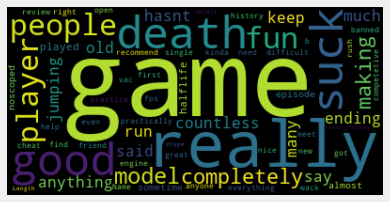

<Figure size 1440x720 with 0 Axes>

In [9]:
wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(df_up["clean_review"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

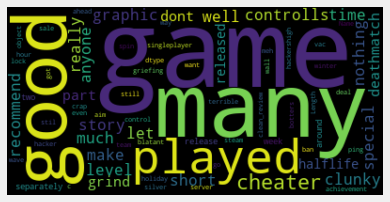

<Figure size 1440x720 with 0 Axes>

In [10]:
wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(df_down["clean_review"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

In [11]:
IPython.display.Audio(sound_file, autoplay=True, rate=1000)

## Importing packages to use in order to create the visulizations

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 100)

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import re
import string
import nltk
import xgboost

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

import sys


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, plot_confusion_matrix

from textblob import TextBlob, Word
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/elliott/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Reading in the Data 
#### Doing simple Data processing to prepare it for the visulizations, like running it through a function to use stop words and break on white space

In [3]:
data = pd.read_csv("../../../data/thanos.csv")
data.head()


,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198271088129,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",good models\n,True,True
1,76561198138206834,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I completely suck at making anything on here and death run keeps ending in countless deaths beca...,True,True
2,76561198128760839,70,Half-Life,"['FPS', 'Sci-fi', 'Action', 'Singleplayer', ""1990's"", 'Shooter', 'Multiplayer', 'First-Person', ...",There is not much to say about this old game that hasn't been said really. Many people have play...,True,True
3,76561198079636858,6060,"Star Wars: Battlefront 2 (Classic, 2005)","['Action', 'Multiplayer', 'Shooter', 'Third-Person Shooter', 'Classic', 'Sci-fi', 'Space', 'FPS'...",360 noscoped almost everything 10/10 even the single player is fun...,True,True
4,76561198238100200,220,Half-Life 2,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Singleplayer', 'Story Rich', 'Shooter', 'First-Person', ...",No need for a review. It's practically history.,True,True


In [4]:
data["voted_up"] = data["voted_up"].astype(int)

data.head()

,steamid,appid,app_title,app_tags,review,fps,voted_up
0,76561198271088129,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",good models\n,True,1
1,76561198138206834,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I completely suck at making anything on here and death run keeps ending in countless deaths beca...,True,1
2,76561198128760839,70,Half-Life,"['FPS', 'Sci-fi', 'Action', 'Singleplayer', ""1990's"", 'Shooter', 'Multiplayer', 'First-Person', ...",There is not much to say about this old game that hasn't been said really. Many people have play...,True,1
3,76561198079636858,6060,"Star Wars: Battlefront 2 (Classic, 2005)","['Action', 'Multiplayer', 'Shooter', 'Third-Person Shooter', 'Classic', 'Sci-fi', 'Space', 'FPS'...",360 noscoped almost everything 10/10 even the single player is fun...,True,1
4,76561198238100200,220,Half-Life 2,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Singleplayer', 'Story Rich', 'Shooter', 'First-Person', ...",No need for a review. It's practically history.,True,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23183 entries, 0 to 23182
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   steamid    23183 non-null  int64 
 1   appid      23183 non-null  int64 
 2   app_title  23183 non-null  object
 3   app_tags   23183 non-null  object
 4   review     23183 non-null  object
 5   fps        23183 non-null  bool  
 6   voted_up   23183 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 1.1+ MB


In [6]:
data["voted_up"].value_counts(normalize=True)

1    0.505888
0    0.494112
Name: voted_up, dtype: float64

In [7]:
def CleanText(reviews):
    stopwords = nltk.corpus.stopwords.words('english')
    punct = string.punctuation
    lemma = nltk.WordNetLemmatizer()
    
    reviews = "".join([word for word in reviews if word not in string.punctuation])
    tokens = re.split('\W+', reviews)
    reviews = [lemma.lemmatize(word) for word in tokens if word not in stopwords]
    
# use function like this in your notebook
# df['cleaned_text'] = df['text'].apply(lambda x: CleanText(x.lower()))
    
    return reviews


In [8]:
data['clean_review'] = data['review'].apply(lambda x: CleanText(x.lower()))

data.head()

,steamid,appid,app_title,app_tags,review,fps,voted_up,clean_review
0,76561198271088129,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",good models\n,True,1,"[good, model, ]"
1,76561198138206834,4000,Garry's Mod,"['Sandbox', 'Multiplayer', 'Funny', 'Moddable', 'Building', 'Comedy', 'Co-op', 'Mod', 'First-Per...",I completely suck at making anything on here and death run keeps ending in countless deaths beca...,True,1,"[completely, suck, making, anything, death, run, keep, ending, countless, death, suck, jumping, ..."
2,76561198128760839,70,Half-Life,"['FPS', 'Sci-fi', 'Action', 'Singleplayer', ""1990's"", 'Shooter', 'Multiplayer', 'First-Person', ...",There is not much to say about this old game that hasn't been said really. Many people have play...,True,1,"[much, say, old, game, hasnt, said, really, many, people, played, halflife, 2, episode, sometime..."
3,76561198079636858,6060,"Star Wars: Battlefront 2 (Classic, 2005)","['Action', 'Multiplayer', 'Shooter', 'Third-Person Shooter', 'Classic', 'Sci-fi', 'Space', 'FPS'...",360 noscoped almost everything 10/10 even the single player is fun...,True,1,"[360, noscoped, almost, everything, 1010, even, single, player, fun]"
4,76561198238100200,220,Half-Life 2,"['FPS', 'Action', 'Sci-fi', 'Classic', 'Singleplayer', 'Story Rich', 'Shooter', 'First-Person', ...",No need for a review. It's practically history.,True,1,"[need, review, practically, history]"


##### creating new variables based off a 1 or 0 vote by users

In [9]:
df_down = data.loc[data['voted_up'] == 0]
df_up = data.loc[data['voted_up'] == 1]

##### Creating WordClouds and TextBlobs for both up and down votes

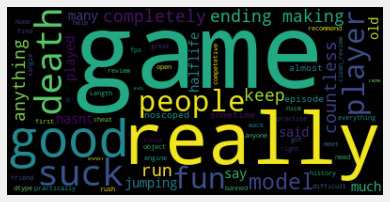

<Figure size 1440x720 with 0 Axes>

In [10]:
wordcloud = WordCloud(max_words=10000, width=400, height=200).generate(str(df_up["clean_review"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

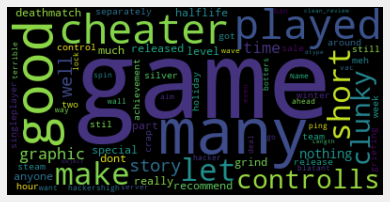

<Figure size 1440x720 with 0 Axes>

In [11]:
wordcloud = WordCloud(max_words=10000, width=400, height=200).generate(str(df_down["clean_review"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/elliott/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Text(0, 0.5, 'Number of occurence')

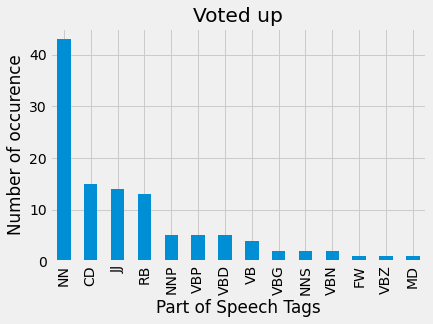

In [13]:
blob = TextBlob(str(df_up["clean_review"]))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', title="Voted up" )
plt.xlabel("Part of Speech Tags")
plt.ylabel("Number of occurence")


Text(0, 0.5, 'Number of occurence')

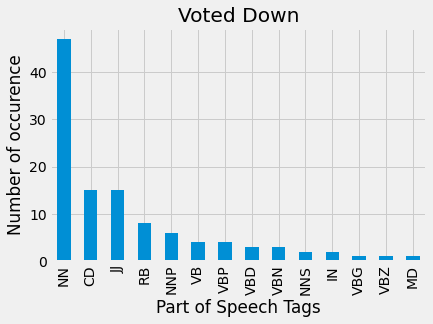

In [14]:
blob = TextBlob(str(df_down["clean_review"]))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', title="Voted Down" )
plt.xlabel("Part of Speech Tags")
plt.ylabel("Number of occurence")

